### Week 9 day 4 : Logistic Regression

#### Introduction to Logistic regression

Sometimes linear regresssion is just a base we build on.

Real world problems often requires more sophisticated non linear models.

How non linear?

They may be 

. quadratic

. exponential 

. logistic

As in this case.

A logistic regression implies that the possible outcome are not numerical but rather categorical.

In thesame way we included categorical predictors into a linear regression through dummies.

y = x0 + b1x1 + b2dummy (category 1 , Category 2)

We can predict a  categorical outcome through a logistic regression.

For eg.

yes/no

will buy /won't buy

0/1

Infact, in a business context, decision making often boils down to a yes/no situation.

Using linear regression ,we can make prediction about the price the customer will pay if she buys.

With the logistic regression we can make a much more fundamental forecast:

Will the customer buy at all ?

#### Course Notes:  Logistic regression

Logistic regression vs Linear 
regression

Logistic regression implies that the possible outcomes are not numerical but
rather categorical.

Examples for categories are:

• Yes / No

• Will buy / Won’t Buy

• 1 / 0

Linear regression model: Y=β0
+β1X1
+…+βkXk+ε

Logistic regression model: 𝑝(X) =
𝑒
(β0
 +β1X1
 +…+βkXk
) 

/

1+𝑒
(β0
 +β1X1
 +…+βkXk
)



Logistic model

The logistic regression predicts the probability of an event occuring.


   Input   =>  probability

Logistic regression model

Logistic regression model

𝑝(X)
/
1 −𝑝(X)

= 𝑒
(β0
 +β1X1
 +…+βkXk
)

The logistic regression model is not very useful
in itself. The right-hand side of the model is an
exponent which is very computationally
inefficient and generally hard to grasp.

ODDS =

𝑝(X) 
/
1 −𝑝(X)

Coin flip odds:
    
The odds of getting heads are 1:1 (or simply 1)

Fair die odds:
The odds of getting 4 are 1:5 (1 to 5)

Logit regression model

When we talk about a ‘logistic regression’ 

what we
usually mean is ‘logit’ regression – a variation of the

model where we have taken the log of both side

log ( 𝑝 (𝑋) /

1−𝑝 (𝑋)
) 

=log( 𝑒
(β0+β1𝑥+⋯β𝑘𝑥𝑘)
)


log ( 𝑝 (𝑋) /

1−𝑝 (𝑋)
) 

= β0 + β1𝑥 + ⋯ β𝑘𝑥𝑘


log (o𝐝𝐝𝐬) = 𝜷𝟎 + 𝜷𝟏𝒙 + ⋯ 𝜷𝒌𝒙k

The remaining on the notebook

#### A simple example in python

Similar to our SAT -> GPA example in

our last session, we will explore an 

SAT -> ADMISSION problem,

In this case ,we are not interesting 

in the GPA a student will obtain at 

graduation as they will not have a GPA 

if they dont get admitted.

Instead our focus will be predicting 

whether a student will be admitted or not.

Lets explore the data set in Jupiter notebook.

###### Basics of logistic regression

###### Import the relevant libraries

In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


##### Load the data

Lets load the information into a variable called raw data

In [13]:
raw_data = pd.read_csv("C:\\Users\\user\\Desktop\\python files - Copy\\2.01. Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


Each row represents a different student.

Like dummies we must convert the 

yes/no to 1 /0 to be able to use the 

data for quantitative analysis.

let create a new data called data 

where all no entries from raw data will be mapped to 0 while yes enteries to 1.

In [14]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'yes':1,'No':0})
data

,SAT,Admitted
0,1363,0.0
1,1792,NaN
2,1954,NaN
3,1653,0.0
4,1593,0.0
...,...,...
163,1722,NaN
164,1750,NaN
165,1555,0.0
166,1524,0.0


The above is our final dataframe.

##### Variables

Lets visualize the data we have.

We are predicting 'Admission' so the admitted column wil be our y variable 

while SAT score willl be our x variable

In [15]:
y = data['Admitted']
x1 = data['SAT']

Having done this, lets create a 

scatter plot in a familiar way

##### Scatter plot

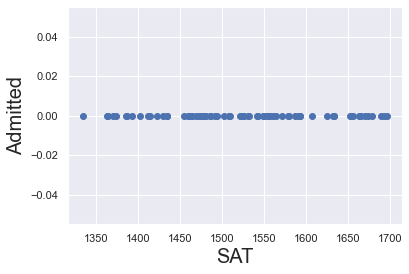

In [19]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

This is a pretty strange scatter plot. this happens when we deal with categorical outcomes.

But is we focus on the graph we will

notice that the graph below ,the outcome was zero or they didnt get admitted

#### Logistic vs logit function

What exactly is the logistic model ?

Conversely, for the students above,

the process was successful and they got admited.

##### Plot with a Regression line

Lets see if a linear regression will be a good fit.

We will apply a linear regression line using thesame methodology like the one used on the last section.

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


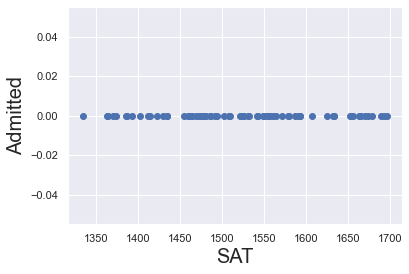

In [30]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Do not focus on the code but rather on the insite our plots give us.

Not only is the linear regression an 

awful fit but it also predicts values with 4 outside and natural domain of admission.

This regression does not even know that our values are bounded between 0 and 1.

Linear regression is a great 

predicting tecnique but simply not fit for this kind of analysis

The first assumption of the OLS is linearity and it is violated.

Our data is non linear.

Hence we must use non linear approaches.

##### plot with a logistic regression curve

In [33]:
reg_log = sm.logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.sort(np.array(x1))
                   
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()    

SyntaxError: invalid syntax (Temp/ipykernel_13784/885840094.py, line 10)

It is bounded by the two outcome

0 and 1.

Interpretation:
    
It shows the probability of admission given an SAT score .

When the SAT score is relatively low, the probability of getting admitted is 0.

When the SAT score is relatively high

,the probabilty of getting admission is 1 or 100 %.

A score inbetween 1600 and 1750 is 

uncertain so there is a probability associated with it.

For instance, if you score 1560, you 

have roughly 50% chance of getting in.

With 17100 you have 0.8 or 80% 

probability of a successfull application.

We will call the curve a logistic regression curve while the method of predicting is called Logistic regression. Welcome to binary prediction.

### Logistic vs logit function

Logistic regression assumptions are very 

close to that of linear regression.

The mean difference is the linearity asumptions.

Logistic regression are non linear by difinition'

What exactly is the logistic model ?

The logistic regression predicts the probabibility of an event occurring.

We are asking the question, given input 

data what is the probability of a student 

being admitted ?

​
INPUT => PROBABILITY

​
What about the name ?

​
We call the regresion logistic as the 

curve we saw is defined by a logistic function.
​

.1 It has an A shape and

.2 It is bounded by 0 and 1.

THese two properties are what we will see

next and the reasons why this type of 

regression is so useful for binary prediction.


In algebraic terms , the linear regression 

model :looks like this :

y = β0 + β1𝑥1 + ⋯+ β𝑘𝑥𝑘 + Σ

The logistic regression model is quite 

different, it is difined by the following expression.

Linear regression model:

 𝑝(X) = 𝑒 (β0 +β1X1 +…+βkXk )

/

1+𝑒 (β0 +β1X1 +…+βkXk )

It is explained thus:

Exponential of the linear combination of 

the input in coeficient divided by 1 + thesame exponential

There is another formula called the logit formula:

If we transform this formula in a certain way . we will get the probability of the 

event occuring dividd by the probability of the event not occuring equals the exponential from above.

p(X)  / 1 - p(X)  = 𝑒 (β0 +β1X1 +…+βkXk )

The left hand side have a very intuitive intepretation.

It is called ODDS [ p(X)  / 1 - p(X) ]

For instance, if you throw a fair coin, there are two possibilities.

HEADS 

Probability:50% 


TAILS

Probability:50%



What is the probability of getting heads ? 50% 

But what is the odds of getting head ?.

Odds = p(heads) / p (tails)

ie 50 % : 50 %  or  1 : 1

What about a fair dice ?

If we want to find the odds of getting a 6 

= p(getting)  / p(not getting)

=  1/6 / 5/6 

= 1:5  (one fifth)

Hence, the odds are 1 to 5

LOGIT MODEL

The odds are equal to the exponential exprssion.

We know that the log is the opposite of the exponential

so we will take the log of both sides

p(X) / 1 - p(X) = 𝑒 (β0 +β1X1 +…+βkXk )

log(p(X) / 1 - p(X) =

log (𝑒 (β0 +β1X1 +…+βkXk ))

In [ ]:
This results in a very elegant model

In [ ]:
log(p(X) / 1 - p(X) = β0 +β1X1 +…+βkXk 

The log of the odds is equal to a linear 

model and not any linear model but pricely 

thesame one we had in the linear regression.

But no exclusive error term though

log(odds) = β0 +β1X1 +…+βkXk 

linear regression model: 
    
y = β0 + β1𝑥1 + ⋯+ β𝑘𝑥𝑘 + Σ    

Another assumption of the linear model is 

that the expected value of the error term is 0

E(Σ) = 0

For all practical purposes , the two 

models are equivalent.

We can use either of them:
    
 i. Logistic function  or model

ii. Logit function or model

But it is much simpler to use the logit one

Linear Regression is the basis of logistic regression.

Given that the model is not very different our main concern from now on is how to 

interpret the coefficient of a logistic regression.

#### Building a logistic regression

How to build a logistic regression using the statsmodels library

In [ ]:
Import all relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Load the data

In [3]:
raw_data = pd.read_csv("C:\\Users\\user\\Desktop\\python files - Copy\\2.01. Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'yes':1,'No':0})
data

,SAT,Admitted
0,1363,0.0
1,1792,NaN
2,1954,NaN
3,1653,0.0
4,1593,0.0
...,...,...
163,1722,NaN
164,1750,NaN
165,1555,0.0
166,1524,0.0


Declare the dependent and the independent variables

In [5]:
y = data['Admitted']
x1 = data['SAT']

Regression

First we must add a constant

s = sn.add constant of x1

We will create the regression in two steps.

step 1 : we declare a regreesion variable called reg_log

Then define a way to calculate the regression.

Instead of OLS we must use a different method 'Logit'

Logit takes as an argurment the dependent variable and independent variable.

Just same as we had with the OLS

Next, lets fit the regression 

lets declare a new variable result log

result_log = reg-log.fit 
then we run the code

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: endog must be in the unit interval.

The result we got is optimization terminated successfully

current function value : 0.137766 
iterations 10

this means that we managed to fit the regression'

It took 10 itinerations, the current function value in some numbers.

This refers to the idea that stasmodels as most modern library use the machine learning algorithm to fit the regression.

The function value (0.137766) shows the value of the objective function at the 10th 

Why do we need such information

There is always a possibility that 

afte ra certain number of itirations the model will not learn.

Therefore, it cannot optimize the optimization function


In statsmodels the maximum nunber of itirations is 35 and after that it will stop trying.

and you will get a message

Warning: maximum number of iterations has been exceeded.

current function: value: 0.569530
iterations:35

We have created our first logistic summary.

#### An invaluable coding tip

###### Logistic regression summary

Summary

In [7]:
results_log.summary()

NameError: name 'results_log' is not defined

We got an error mesage 

AttributeError: module 'scipy.stats' has no attribute 'chisqprob'

Yoy can find a discussion about this on github

It seems that statsmodels was using a function from scipy but that function was 

changes or moved from scipy which caused 

some methods in stasmodels to stop working including this one.

The fix is so easy that one of the 

developers of scipy basically said they will not bother until the next release.



What is the work aruond?

We are basically filling in thesame function that is no longer there.

How do i know all these ?

Google is your friend , google the error message when you encounter such.

There are two take aways from this lecture

1. Open-source projects like python and

its libraries are not immaculate.

2. Workarounds are out there waiting for you to find them

Things break and they also get fixed .

The internet is a big enough space for both mistakes and solutions . 

#### Understanding the tables

####  Regression summary

We will be looking at new vocabulary and its meaning.

1. MLE : Maximum likelihood estimation

lets look at the likelihood function on which it is based.

A likelihood function is a function which estimates how likely it is that the model 

at hand describes the real underlying relationship of the variables.

In simple words, the bigger the likelihod function , the higher the probability that our model is correct!

 MLE ties to maximize the likelihood function.
 
 This is why it is called maximum likelihood estimation.

Knowing this with the fact that iterations are in play

we should already have an idea on what happens behind the scene.

The computer is going through different 

values until it finds a model for which the likelihood is the highest.

When it can nolonger improve it will just stop the optimization.

That is also how a typical machine learning process goes.

##### Log likelihood:

Log likelihood is mostly used when performing MLE.

Because of its convenience, the log likelihood is the most popular matrix

The value of the log likelihood is almost but not always negative and the bigger it, the better.

##### LL-Null (log likelihood-null)

LL-Null (log likelihood-null):  

The ll-null is the log likellhood of a model which has no independent variables.

Actually the same y is the dependent 

variable of that model but the sole independent variable is an array of ones.

This array is the constant we are adding with the add constant method

y = β0 * 1

EXAMPLE

Here is an array of ones only,
If we create a logistic regression based 

on it, it will have a log likelihood equal to the l0 null of the previous model.

In [ ]:
x0 = np.ones(168)
reg_log - sm.logit(y,x0)
results_log = ref_log.fit()
results_log.summary()

Why is it lke this?

you may want to create the log likelihood 

of your model with the LL-null to see if your model has any explanatory power

Lets check if our model is significant.

We have ths f-test result for the linear regression

F -statistc : 27.76

prob(F-statistic): 6.58e-10

There must be one for logistic regression as well.

It is called the log likelihood ratio test

LLR(Log likelihood ratio):
    
It is based on the log likelihood of the model and the ll- null

It measures if our model is statistically 

different from LL-null ,a.k.a a useless model.


Without telling you the exact way to 

perform it, we have its p-value and thats all we need.

As we can see it is very low around -0.000

Our model is significant

##### Pseudo R-squared

Pseudo R-squared:
    
Unlike the linear one,there is no such 

thing as the clearly defined R-squared for the logistic regression.

There are several proposition which have 

similar meaning to the R-sqaured but non is close to the real deal.

We also have 

AIC

BIC

McFadden's R-squared

McFadden's R-squared:

According to McFadden himself, 'A good Pseudo R-squared is somewhere between 0.2 and 0.4.

Moreover, this measure is very useful for comparing variations of the same model.

Different models will have completely different and incomparable pseudo R-quared '

What we have left is a coef. table that we 

can read perfectly but unfotunately we cant understand it .

This will be explained in the next lesson

#### What do the odds actually mean

We will be looking at the coefficient and its intepretation.

We will be using a bit of mathematical 

approach but it will not be too hard to follow no matter your background.

Logit model

What was the logit model for the Sat -

Admittance regression we created?

log(π / 1- π)  = -69.91 + 0.042 * SAT

π refers to the probability of an event occuring

1- π  refers to the probability of the event NOT occuring.


The fraction of this 2 is  avery popular concept,( odds) as we explained earlier.

From the regression summary, it seems that our model is log of the odds is 

-69.91 + 0.042 * SAT

Result intepretation:

Lets take two SAT scores

SAT 1 and SAT 2

if we plug them in ,we will get 2 equations. 

one for each of them.

log(odds2) = -69.91 + 0.042 * SAT2

log(odds1) = -69.91 + 0.042 * SAT1

Lets create their difference

log(odds2) = -69.91 + 0.042 * SAT2

-
log(odds1) = -69.91 + 0.042 * SAT1


=
log(odds2)- log(odds1)  = 0.042(SAT2- SAT1)

The difference between the logs is

the coefficient of their argument.

Difference of 1 unit of SAT

Log(odds2 / odds1) = 0.042 * 1

To solve this equation, we must take the 

exponential of the two sides as the expontial of log of x = x by definition

elogx = x

In this way we will simplify the expression further.

In the end we get

eLog(odds2 / odds1) = e0.042 * 1

odds2 / odd1)=  1.042

This can be re-arranged as well

odds2 = 1.042* odds1 

ie odds 2 is 4.2% higher than  odds1

or odds2 = 104.2% * odds1

Ie odds2 is 104.2% of odds one

When the SAT score increases by 1 , 

the odds of admittance increases by 4.2%.

This formula we just arrived is 

irrespective of the SAT score.

Log(odds2 / odd1) = 0.042 (SAT2 - SAT1)

It only takes into account the size of the difference.

Therefore, we can derive the general rule

For a unit to change in a variable, the

change in the odds equals the exponential

of the coefficient.

This provides us with a way of intepreting the coefficient of  a regression.

△odds = e^bk

What about the difference in SAT scores of 10 points

Difference of 10 units of SAT

We can use thesame approach to find that

Log(odds2 / odd1) = 0.042 * 10 = 

 0.42

odds2 = 152% * odds1

What about getting 100 units of SAT scores

Difference of 100 units of SAT

odds2 = 6669% * odds

These are the bais of coefficient intepretation.

They are not supper intuitive but thats how it works.

#### Binary predictors in a logistic regression

The same way we created dummies for a 

linear regression, we can use binary 

predictors in a logistic regression.

##### load the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#Apply a fix to the stasmodels libraries
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [2]:
raw_data = pd.read_csv('C:\\Users\\user\\Desktop\\python files - Copy\\2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [ ]:
There is a new piece of information' Gender'

lets map the variable in a known way.

In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'yes' : 1, 'No' :0})
data['Gender'] = data['Gender'].map({'Female' : 1, 'Male' : 0})
data

,SAT,Admitted,Gender
0,1363,0.0,0
1,1792,NaN,1
2,1954,NaN,1
3,1653,0.0,0
4,1593,0.0,0
...,...,...,...
163,1722,NaN,1
164,1750,NaN,0
165,1555,0.0,0
166,1524,0.0,0


Lets create the regression and et the summary. Note that male is the base line

##### Declare the dependent and the independent variables

In [4]:
y = data['Admitted']
x1 = data['Gender']

##### Regression 

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

ValueError: endog must be in the unit interval.

##### Result intepretation

Ll.Rp.value: 06.283e-10  is significant and the

Gender  0.000 is also significant. 

The only thing left is to inteprete it. 

We can use same idea ad the last time.

The model is 

log(odds) = -0.64 + 2.08 * Gender

log(odds2) = -0.64 + 2.08 * Gender2

log(odds2) = -0.64 + 2.08 * Gender1

Then find the difference

log(odds2) = -0.64 + 2.08 * Gender2

-
log(odds2) = -0.64 + 2.08 * Gender1

log(odds2 / odds1)   =  2.08 * (Gender2 - Gender1)

THere is only two possible values : 1 0

Hence, there is only a unit change there.

Hence, let Gender 2 be equal to 1 and gender 1 equal to 0.

But by design 1 is female and 0 is male,

so odds 2 is the odds of  a female to get 

Admitted and odds 1 is the odds of  a male to get admitted

log(odds2  females/ odds1 male)   =  2.08 * (1 - 0)

Therefore the log of the odds of a female to get

admitted divided by tje log of the odds of a man to get admitted equals 2.08

log(odds2  females/ odds1 male)   =  2.08

If we take the exponential of both sides, we get

that the odds of a female tp get addmitted are 7.99 times that of  a male 

In [ ]:
odds female =7.99 * odds male

The above is the intepretation of binary predictors coefficient.

It is like that of continuos predictors but actually impler.

We know there is a strong relationship between SAT scores and Admittance.

lets create a new regression that will include both predictors

In [8]:
y = data['Admitted']
x1 = data['SAT','Gender']

KeyError: ('SAT', 'Gender')

In [9]:
x = sm.add_constant(x1)
reg_log = sm.logit(y,x)
results_log = reg_log.fit()
results_log.summary()

NameError: name 'x1' is not defined

What we get is a regression which has a much 

higher log lilelihood than we had earlier.

log-likelihood: -20.180

Which means it isa better one.

Previous likelihood with only Gender was 

'log-likelihood: -96.140

This makes sense because SAT score was an 

outstanding predictor.

Gender variable : we can see that the gender variable is significan  0.022 but we no longer have those 3 zeros we had earlier.

The new coefficient of gender is 1.9449

The exponential of 1.94 is around 7


The intepretation is as follows:

Given the same SAT score, a female is 7 times more likely to be admitted than a male

In [ ]:
np.exp(1.9449)

We must always think about the information revealed to us through thees matrix.

It seems that to to universities , ti is much easier for females to enter.

In th real world this is an incredibly common situation.

Universities place quotas on students as they are pursuing equality.

However, professions on commmunications are predominantly female.

While STEM is predominantly male.

Therefore, if a male appyly for communications, its odds inventory may be 10 times higher than that of  a female.

This means is much easier for males to enter .

and vice versa, if a female applies for STEM, it will be much easier to enter than a male of the same SAT score

We may not have much conext in this example but we obviously do in real life cases.

Always inteprete the result considering the context, if they seem illogical ,

it may be worth revisiting your model rather thn blindly following it.

#### Calculating the accuracy of the model

We said that there is a pseudo R-squared that gives us a pseudo sense of how well our regression is doing .

In practice though, there are better ideas on how to process the accuracy of the model.

We have a model that prdicts values and we also have the actual values that we observed.

We can check the accuracy .

We already saw the method predict

sm.LogitResults.predict()  returns the values predicted by our model.  (sm statsmodels statistics in python)

##### Accuracy

In [16]:
results_log.predict()

NameError: name 'results_log' is not defined

In [ ]:
This gives us all the predicted values.

We can apply some formatting to make it more legible

In [19]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

NameError: name 'results_log' is not defined

We can see that there are 000s, ones and some values inbetween.

These are probabilities.

In the model, in the model these are the values of pi( π ).

The probability of being admitted.

Altimately ,values below 0.5  means that there is less than 50% chance of admission.

So we will run down

Alternatively ,values above 0.5 will be rounded up

Using this simplification, what we can do is to compare the actual values we observed with the values the model predicted

In [3]:
np.array(data['Admitted'])

NameError: name 'data' is not defined

If 80% of the predicted values coincide with the actual values we say the model have 80% accuracy.

There are alot of values to compare, 

we can summarize them in a table with this method pred.table available in stasmodels

In [ ]:
results_log.pred_table()

In [ ]:
The result we get are 4 tables

we will format the result and discuss it

In [21]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['predicted 0','predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

NameError: name 'results_log' is not defined

The table is called 'CONFUSION MATRIX'

It is called confusion as it shows how confused our model was.

Although some people call it the confusing matrix

For 69 observations the model predicted 0 when the true value is 0,

For 90 observations the model predicted 1 and it actually was 1.

These cells indicated how many case the model did its job well.

How in 4 cases the model predicted 0 while the true value was 1.

For 5 observations the model predicted 1 and value was 0 , the true value was 0 

The model got confused in the last two cases.

There are many different cases we can calculate ffrom this matrix, the most important one is the accuracy of the model.

In 69 plus 90 (159)of the cases the model was correct, in 4 plus 5 (9) of the cases the model was incorrect.

Overall, the model made an accurate prediction of 159 out of 168 cases.

In [ ]:
This gives us  a 159 /168  = 0.94 6 

` 94.6 % accuracy

Our model seems vrery good in classifying.

Below is a short piece of code that will calculate the accuracy for you.

In [10]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

NameError: name 'cm_df' is not defined

Homework


Calculate the accuracy of all the work we have done in this session.

#### The concept of overfitting

One of the most common aspect of data sciene interviews is about  overfitting.

A  recruiter will suddenly bring up th topic and
ask you . 'what is overfitting and how do we deal with it.

There are two concept that are inter=related under fitting and over fitting.

They go together and understanding one helps us to understand the other and vice versa.

Over fitting means that our training has focused 
so much on a particular training set so much that it has missed the point.

Random noise is captured inside an over fitting model

Underfitting means that our model has not captured the underlying logic of the data.

It doesn't know what to do and therefore provides an answer that is far from correct.

It doesn't have strong predictive power

They are clumsy and have low accuracy

Over fitting and under fitting are problems encompassing predictive analysis asa whole .

Logistic Regression over-fitting problems

Imagine we have an graph with an observation of 10 points.

Then someone gave us one other 100 observations from thesame population.

We quickly released that the relationship have nothing to do with what we have found. 

In real life, the case will not be as dramatic.

Our population data is likely to be distributed in another way. 

pls refer to note bok for the graph.

We observed from the graph that some points are mis-classified because of the initial model.

After a quick re -examination, we realised that the real relationship is quite similar but a bit to the left.

Popular solution to over fitting is by splitting our data into 2

1. Training 

2. Test

Splits like 90 % training and 10 percent test or 80% training and 20% test are common

Steps

i. create the regression on the training data.

ii.After we hvae the co efficient, we test the model on the test data by creating a confusion matrix and accessing the accuracy.


The whole point is that the model have never seen the test data set so it cannot over firt on it.

#### Testing the model

##### Testing the model and assessing the accuracy

We must test our model

Testing is done on a dataset our model has never seen before.

I will load a new dataset

In [8]:
test = pd.read_csv('C:\\Users\\user\\Desktop\\python files - Copy\\2.03. Test dataset.csv')

test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


The regression was trained on the first dataset and we will test it now.

As we said earlier splitting the dataset is a common practice and an almost compulsory one.

Our split is 9010, which means there are 90 observations for the test.

In [ ]:
Next,we wil map our categorical data in a very well known way.

In [12]:
test['Admitted'] = test['Admitted'].map({'yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test

,SAT,Admitted,Gender
0,1323,NaN,0
1,1725,NaN,1
2,1762,NaN,1
3,1777,NaN,0
4,1665,NaN,0
5,1556,NaN,1
6,1731,NaN,1
7,1809,NaN,1
8,1930,NaN,1
9,1708,NaN,0


Our plan

1. We will use our model to make predictions based on the test data.

2. We will compare thse based on the actual outcome

3. Calculate the accuracy.

4. we will also create a confusion matrix on our own.


In other to predict values using the statsmodels  method ,predict we used earlier.

sm.logitResults.predict() returns the value predicted by our model.

our test data should look thesame as the input data on which the regression was trained.

After printing the variable x we see that there are 3 columns

constant , SAT and Gender in that order.

Order is very important because the coefficient of the regression will expect it.
If we fail to deliver the correct order, the prediction will be wrong.

In [13]:
x

NameError: name 'x' is not defined

Lets cretae a new variable called test actual and input the admission information which are the actual outcomes we observed

We will declare another variable called test data which will contain everything from test except for the admission information.

This leaves us with SAT and Gender

To ad a constant we can use the sm.add_constant(test_data) method

In [17]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


Observe that te data looks exactly like the input data

Note, that we are lucky here as the 

variables remained inthe same order

Normally you will have to re=order the column to match those of x

In [ ]:
If you ever need to do it on your own, this is the code to use

In [ ]:
#test_data = test_data[x.colums.values]
#test_data

The final step is to create the confusion
matrix but unfortunately ststsmodels does not create this functionality unlike sciky learn .

We explained that the confusion matrix is 

simplty a place to summarize  all the available values.

Lets manually create a function called confusion matrix.

In [7]:
def confusion_matrix(dat,actual_values,model):
  
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values. pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [ ]:
There will be 3 arguement

i. data

ii. actual_values

iii. model



Our  function will use the already created regression model to make predictions based on the data.

Then it will summarize the values on a table

Finally, we will make it calculate the accuracy as well.

Once used the function will return the confusion matrix and accuracy.

In [ ]:
In the resousces you will find the code with detailed comments. 

#def confusion_matrix(dat,actual_values,model):
   #confusion matrix
   #parameters 
   #...........
    #data: dat from or array
    #data is a data from formatted in the same way as your input data(without the actual values)
    #e.g const.var1, var2, ete Order is very important!
#actual_values: data frame or array
#These are the actual values from the test_data
#In the case of a logistic regression,it should be a single column with 0s and 1s





    #predict the values using the logit model
    #pred_values = model.predict(data)
    #Specify the bins
    bins=np.array([0,0.5,1])
    #Create a histogram,where if values are betwee 0 and 0.5 tell will be considered 0
    #if they are between 0.5 and 1 ,they will be considered 1
    cm = np.histogram2d(actual_values. pred_values, bins=bins)[0]
    #Calculate accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, acuracy
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values. pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    #Return the confusion matrix and the accuracy
    return cm, accuracy


In [ ]:
Is now time to test the model

In [8]:
cm = confusion_matrix(test_data,test_actual,results_log)
cm

NameError: name 'test_data' is not defined

From our result, the left part is the confusion matrix.while the right part is the accuracy.

The accuracy of the model is actually 89.47% and this is also the figure we used to refer to the overall accuracty of the regression.

Almost always the training accuracy is bigger than the test accuracy.

That is because of the over-fitting we talked about

The regression fit in the training data as well as possible.

But that doesnt mean that the prediction is true for all the values of the population.

That's why we test data the model have never seen and make our conclusions on that.

In [ ]:
Formatting the confusion matrix

In [ ]:
Finally we will format the confusion matrix

should you want to examine further

In [10]:
cf_df = pd.DataFrame(cm[0])
cm_df.columns = ['predicted 0', 'predicted 1']
cm_df = cm_df.rename(index={0; 'Actual 0' ,1:'Actual 1'})
cm_df

SyntaxError: invalid syntax (Temp/ipykernel_8976/4039409596.py, line 3)

The opposite of accuracy is the 'Missclassification rate'

Missclassification = #missclassified / #all elements


In [ ]:
In this case it is 1 + 1 / 19 = 10.53%

In [12]:
print ('Missclassification rate: '+str(1+1)/19))

SyntaxError: unmatched ')' (Temp/ipykernel_8976/583650851.py, line 1)

#### Logistic Regression Quiz

N0 1.

Suppose that you have trained a logistic regression 

classifier, and it outputs on a new example a 

prediction h0(x) = 0.2. This means (check all that apply):

Ans :our estimate for P(y = 0|x; θ) is 0.8. 

2. Suppose you have the following training

set, and fit a logistic regression 

classifier

h0(x) = g(0o + 01x1 + 02x2)

Answer;

Adding polynomial features (e.g., instead using/) 

h0(x)= g(0o) + 01x1 + 02x2 + 03x^2 1 

+ 04x1x2 + 05x^2 2)

could increase how well we can fit the 

training data.


At the optimal value of θ (e.g., found by 

fminunc), we will have J(θ) ≥ 0.

3. For logistic regression, the gradient is

given by  

a / a0j(0) = 1/mΣ^m i=1(h0(x^(i)) -

y^i)x^(i)j

.  Which of these is a correct gradient 

descent update for logistic regression with

a learning rate of ά?

Which of the following statements are true? Check all that apply.

Answer: 

0j: = 0j -  ά1/m Σ ^m i-1(h0(x^(i)-y^1)xj^(i)

(simultaneously update for all j).
                         
                         
0j: = 0j -  ά1/m Σ ^m i-1( 1 / 1 + e^-0T x ^(i)  - y^(i)xj^(i)

(simultaneously update for all j).
                                                  

N0 4 

 Which of the following statements are true? Check 
 
 all that apply.


In [ ]:
Answer 

The one-vs-all technique allows you to use logistic regression for problems in which each

y^(i)
comes from a fixed, discrete set of values.

N0.5

Suppose you train a logistic classifier

.h0(x) = g(0o + 01x1 + 02x2) Suppose 0o =06,01=-1,02 = 0 . 

Which of the following figures represents the 

decision boundary found by your classifier?

In [ ]:
Ans in notebook

#### Regularized Regression

##### Regularization in Machine learning 

Our focus is on the following.

>. Fitting the Data

>. Understanding linear Regression

>. Bias and Variance 

>. What is Overfitting?

>. What is Underfittting?

>. What is Regularization?

>. Hands on Demos


#### Fitting the Data

Data fitting is a process of plotting a series of data point and 

drawing the best fit line to understand the relationship between the variables.

Linear relationship

Data fitting is also a linear relationship.

And linear means line.

The line used to represent the relationship is a straight line that passes through the data points and the variables have linear relationship.


Linear Regression

How linear Regression works?

Linear regression tries to find the line that best fits the deta 

point and gives a linear relationship between the two variables.

Example

Let's say that we want to find the relationship between the 

temperature outside vs the sales of ice cream.

We wil be looking at 

>. how many ice cream cron we sold.

>. how much we sold an ice cream.

>. How warm is the weather outside which will also draw people into the ice cream store.

Suppose we have 2 lines, L1 and L2 which claim to describe the 

relationship between the variables.

And we will check to see the one that is the best fit.

and which best describes the variable.

First find the square of distance between the line L1 and each 

data point,add them all and find the mean distance.

When we square something whether negative or positive number ,it 

no longer matters because -2sqaured is 4.  and 2squaredd is 4.

So by so doing we are removing which side of the line is on.

we are just looking for the error and in this case the mean

square of each of the little dotted line we see in our graph

This way of calculating the square of the distance , adding them 

and then taking mean is called Mean Squared Error or Loss 

Function

When we talk about loss ,how far off are we . Thats what we are 

really talking about, what do we miss, we have positive and 

negative distance and because we have squared it,it now becomes a positive error.

Mean Squared error (Applyin the formula)

= (2500 + 400 + 400 + 900 + 400 + 2500 + 1600 + 2500 + 400)/11

=  112727

MSE for L1 = 1127.27

We take all the doted lines we calculate them together,then 
average it or find the means.

We will now find the loss function fro our L2 in a similar way

We find loss function for the line L2 in similar fashion and we get the means squared error to be 6397.72.

By analyzing our result we found out that the loss function or mean squared error is less for L1 than L2

Hence, L1 is the best fit line.

This process describes alot of machine learning processes

There is a way we nedd to keep guessing until we find the right answer.
But using mean square is the best way to find the best fit for our model and it is most commonly used.

#### Bias and Variance

They are very important tems to know in machine learning and linear regression.

##### Bias

Bias occurs when an algorithm has limited flexibility to learn from data

Bias is very generalized


Such modela pay very lottle attention to the training data and 

oversimplify the model therefore the validation error or 

prediction error and training error follow similsr trends

With bias if you over simplify it so much, you will miss the real fit.

You will just guess what the average is and that becomes your answer.



Such error always leads to high errors on training and test data
as of bias . 

This is because we are just feeding in the average and we are not really feeding it close

Example

In a dart game , if all the darts fall  on a particular pointer,

this can be considered as a 'biased throw', and the player aims for the particular score.

The variance sums everything up in one point, averages it and 

looks for the individual predictions coming out.

##### Variance

Variance  defines algorithmn s sensitivity to specific set of data

Variance is very specific


A model with a high variance pays a lot of attention to training 

data and does not generalize therefore the validation erroe or prediction error are far apart from each other. 

Such models usually perform very well on training data but have 

high error rates on test data

With variance we are fitting it so close that the test data is really good.

If  we are doing categorical testing ,it specifies it  eg. this a car, truck, bicycle.

If we look at the pictures form the light we can determine if it is a truck or bicyce  etc

A truck had to have certain features and it might have to be red  because from the pictures we have so manty red pictures.

andif it is  blue then it has to be a bicycle.

That is the kind of variance we mean, it picks up on something  and it cannot get the right anwser unless it gives a very specific data.

After you have seen that you test it in your model,program it and look for how it was trained and what is coming out.

If it is not looking good for you to bias on , and is not looking good on the training and on the test data then it may be bias on your data.

But if it looks good on the training data , it may be that 

variance over-fitted the data.

These are very important things to know when you are building 

your models in regression of any kind or any set up for predicting

Example 

If all the darts fall on different pointers and no two darts fall

on the same pointer, then , this can be considered as a 'varied throw'

and the players aimsfor various scores.

#### Overfitting

This is a scenario where the machine learning model tries to 

learn from the details along with the noise in the data and tries to fit each data point on the curve. 

As a model has very lesss flexibility ,it fails to predict new 

data points and thus the model rejects every new data point during prediction

##### reasons for overfitting

1. Data used for training is not cleaned and contains noise 
(garbage values) in it.

You can spend so much time cleaning your data and at some points

if you have something wrong with the data coming in ,it needs to be addressed
Whether is the source of the data, the measuring tools, the machine bill to know if the numbers are ming in wrong.

2. The model has a high variance
A good example is wind
You may have a 100 test but because the wind is blowing , it is all over the place.

3. Sise of training data used is not enough.
If you use small amount of data ,it will also cause a problem.
when you have a few point ,you will ty to plot everything.

4. The model is too complex.
This comes up alot.You put too many pieces together, how they interact cant even be tracked.

Hence, you have to go back, break it up and find out what correlates and what doesn.t

#### Underfitting

A scenario where machine learning model can neither learn the

relationship between variables in the data nor predict or 

classify a new datapoint.

As the model doesn't fully learn the patterns.

It accepts every new data point during the prediction

 1. Data used for training is not cleaned and contains noise(garbage values) in it.
 
 You need to clean your data. same issue with overfitting and underfitting.

2. The model has a high bias:  example driving cars to facial identification.

The model itself when you build  might have a bias towards one thing.

Underfitting model has such  issue.

For example if you have 5 people from india and 10 people from 

Africa and 20 people from the US, you have created  a bias.

Because is looking at the 20 people and you only have a small amount of data to work with.

3. The size of training data used is not enough

4. Model is too simple

we have one straight line in all the data

#### What is a Good fit?

A line or a curve that best fits the data is neither 

overfitting nor underfitting models but is just right.

#### Regularization

Regularization tecniques are used to calibrate the linear 

regession models in order to minimize the adjusted loss 

function and prevent overfitting or underfitting

In [ ]:
It simply means taking the guess work out

#### Ridge Regression

It modifies the overfitted or the underfitted models by adding 

the penalty quivalent to the sum of the squares of the magnitude of cofficients

We have :
    
Cost function  = Loss +  λ x Σ||w||^2

Here,

Loss = sum of the squared residuals

λ = Penalty for the erors

W = slope of the curve/line

Cost function = Loss + λ x Σ||w||^2

For linear regression line, let's consider two points that are on the line.

Loss = 0 (considering the two points on the line)

λ = 1

W = 1.4

Then cost function = 0 + 1 x 1.4^2   = 1.96

For linear regression line ,lets consider 2 points sitting on the line.

It has a Loss of 0

considering the two pointas on the line , we will do

lambda = 1

W = 1.4 

then you add up to get the cost function as done above.

Now is time to plot it and do the calculation on the data.

Cost function = Loss + λ x Σ||w||^2

For Ridge Regression, let.s assume, 

Loss = 0.3^2 + 0.2^2 = 0.13

λ = 1

W = 0.7

Then,

Cost function = 0.13 + 1 x 0.7^2 = 0.62

Comparing the two models with all the data points, we can see

that the Ridge regression line fits the model more accurately 

than the linear regression line.

#### lasso Regression

It modifies the overfitted or underfitted models by adding the 

penalty equivalent to the sum of the absolute values of coefficients.

Cost function = Loss + λ x Σ||w||

Here,

Loss = sum of the squared residuals

λ = Penalty for the erors

W = slope of the curve/line


Observe we dont square the value here.

Comparing the two models with all data points, we can see that

the Lasso regression line fits the model more accurately than 

the linear regression line

#### Ridge vs Lasso Regression

Ridge(L2)Regularization         


1. Ridge regularization is useful when we have many variables 

with relatively smaller data samples

2. The model does not encourage convergence toward zero but is

likely to make them closer to zero and prevents overfitting.

 Lasso (L1)Regularization


1. Lasso regularization is preferred when we are fitting a linear model with fewer variables.

If you have small variables like 36 you can bring it into 4 variables and laso will do the job well for you

2. It encourages the coefficients of the variables to go towards zero because of the shape of a constant which is an absolute  value.

#### Hands on Demo on Lasso and Ridge Regression

##### Import necessary libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
import colorama
from colorama import Fore, Back, Style

In [5]:
#Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

In [7]:
# Load the dataset
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.array(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

#input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [10]:
#Split the data
x_train, x_test, y_train, y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
test_size = 0.25)

print("Train data shape of X = %  s and Y = % s : "%(
x_train.shape, y_test.shape))

print("Train data shape of X = %  s and Y = % s : "%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (127,) : 
Train data shape of X = (127, 13) and Y = (127,) : 


In [27]:
#Apply multiple linear regression

lreg = LinearRegression()
lreg.fit(x_train, y_train)

#Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

#calculating Mean Squared Error (mse)

 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

#putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  16.737079901908466
    Columns  Coefficient Estimate
0      CRIM             -0.107643
1        ZN              0.045063
2     INDUS              0.049451
3      CHAS              2.265713
4       NOX            -17.914659
5        RM              3.552080
6       AGE             -0.003468
7       DIS             -1.460843
8       RAD              0.328448
9       TAX             -0.012268
10  PTRATIO             -1.081089
11        B              0.006377
12    LSTAT             -0.583788


from the result, we have our mean squared error on test set "16.737" 

At this point, unless you really know the data you are working with it will not mean a whole lot.

NameError: name 'style' is not defined

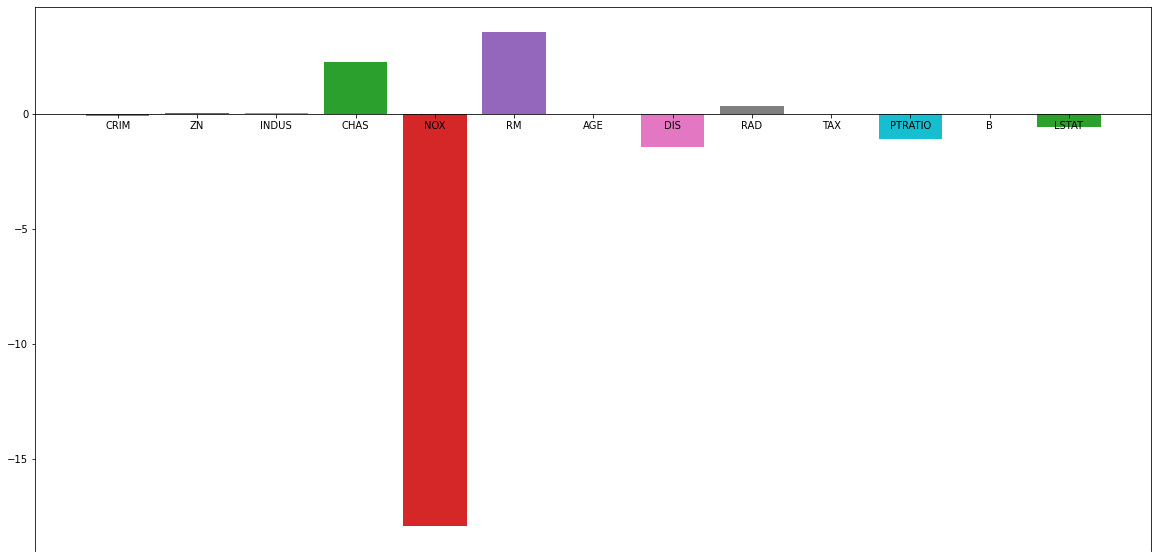

In [30]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color = ['tab:gray', 'tab:blue','tab:orange',
'tab:green','tab:red','tab:purple','tab:brown',         
'tab:pink','tab:gray','tab:olive','tab:cyan',        
'tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt,style.use('ggplot')
plt.show()
                        
         

This helps you to understand what is going on with your data and what you are looking for.

But it depends so much on the domain you are working with


Our motive is to reduce the coefficient score and bring it down as much as we can.

To achievre that we need to work with the ridge regression.

##### Ridge Regreesion

In [35]:
#import ridge regressiob from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

#calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean_squared_error on test set",mean_squared_error_ridge)

#Get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean_squared_error on test set 16.99080418550215
    Columns  Coefficient Estimate
0      CRIM             -0.102771
1        ZN              0.047005
2     INDUS              0.016645
3      CHAS              2.073628
4       NOX             -9.644395
5        RM              3.595063
6       AGE             -0.009466
7       DIS             -1.340481
8       RAD              0.304789
9       TAX             -0.012815
10  PTRATIO             -0.988450
11        B              0.006687
12    LSTAT             -0.599634


NameError: name 'style' is not defined

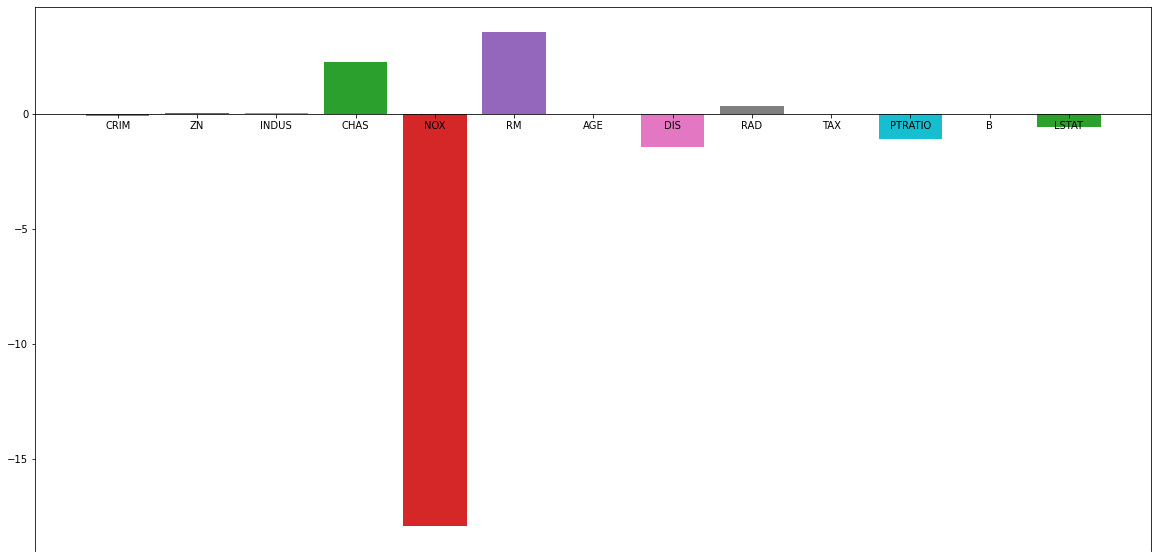

In [36]:
fig, ax = plt.subplots(figsize =(20, 10))

color = ['tab:gray', 'tab:blue','tab:orange',
'tab:green','tab:red','tab:purple','tab:brown',         
'tab:pink','tab:gray','tab:olive','tab:cyan',        
'tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt,style.use('ggplot')
plt.show()
                        

##### Lasso Regression

We can do thesame thing for the lasso regression

In [39]:
#import Lasso regressiob from sklearn library
from sklearn.linear_model import Lasso

#Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

#calculate mean square error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean_squared_error on test set",mean_squared_error)

#Get lasso coefficient and print them
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"]= x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean_squared_error on test set 21.973159793672423
    Columns  Coefficient Estimate
0      CRIM             -0.066764
1        ZN              0.049514
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.808651
6       AGE              0.015848
7       DIS             -0.727448
8       RAD              0.248642
9       TAX             -0.013215
10  PTRATIO             -0.837247
11        B              0.005098
12    LSTAT             -0.812822


If you are working on this data , first is to compare the mean squared error for both Ridge and lasso regreesion and choose te one with the higher figure.

Also lok at the coefficients that may make meaning to your model

In summary fro the analysis, our first model did better than our last two model on mean square error and the test set.

For more information visit www.simplilearn.com